In [1]:
! pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [0]:
import prince
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Import the HR data set (hr_dataset.csv). 

In [0]:
# mount drive for sheets 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [80]:
# import hr data
# import population data
worksheet = gc.open('hr_dataset').sheet1

rows = worksheet.get_all_values()
print(rows)

import pandas as pd
hr= pd.DataFrame.from_records(rows)

[['Age', 'Pay Rate', 'State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 'Days Employed', 'Reason For Term', 'Employment Status', 'Department', 'Position', 'Manager Name', 'Employee Source', 'Performance Score'], ['30', '28.5', 'MA', '1450', 'Female', 'Married', 'US Citizen', 'No', 'Black or African American', '3317', 'N/A - still employed', 'Active', 'Admin Offices', 'Accountant I', 'Brandon R. LeBlanc', 'Diversity Job Fair', 'Fully Meets'], ['34', '23', 'MA', '1460', 'Male', 'Divorced', 'US Citizen', 'No', 'Black or African American', '1420', 'N/A - still employed', 'Active', 'Admin Offices', 'Accountant I', 'Brandon R. LeBlanc', 'Website Banner Ads', 'Fully Meets'], ['31', '29', 'MA', '2703', 'Male', 'Single', 'US Citizen', 'No', 'White', '1154', 'N/A - still employed', 'Active', 'Admin Offices', 'Accountant I', 'Brandon R. LeBlanc', 'Internet Search', 'Fully Meets'], ['32', '21.5', 'MA', '2170', 'Female', 'Married', 'US Citizen', 'No', 'White', '58',

In [81]:
hr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
1,30,28.5,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
2,34,23,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
3,31,29,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
4,32,21.5,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,36,51,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
308,34,46,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
309,30,45,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [0]:
hr.columns = hr.iloc[0]
hr.drop([0], axis=0, inplace=True)

In [83]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Data columns (total 17 columns):
Age                  310 non-null object
Pay Rate             310 non-null object
State                310 non-null object
Zip                  310 non-null object
Sex                  310 non-null object
MaritalDesc          310 non-null object
CitizenDesc          310 non-null object
Hispanic/Latino      310 non-null object
RaceDesc             310 non-null object
Days Employed        310 non-null object
Reason For Term      310 non-null object
Employment Status    310 non-null object
Department           310 non-null object
Position             310 non-null object
Manager Name         310 non-null object
Employee Source      310 non-null object
Performance Score    310 non-null object
dtypes: object(17)
memory usage: 43.6+ KB


In [84]:
hr.nunique()

0
Age                   39
Pay Rate              94
State                 28
Zip                  158
Sex                    2
MaritalDesc            5
CitizenDesc            3
Hispanic/Latino        4
RaceDesc               6
Days Employed        181
Reason For Term       17
Employment Status      5
Department             6
Position              28
Manager Name          21
Employee Source       23
Performance Score      7
dtype: int64

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [0]:
hr['Pay Rate']= pd.to_numeric(hr['Pay Rate'])
hr['Days Employed']= pd.to_numeric(hr['Days Employed'])                           

In [86]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Data columns (total 17 columns):
Age                  310 non-null object
Pay Rate             310 non-null float64
State                310 non-null object
Zip                  310 non-null object
Sex                  310 non-null object
MaritalDesc          310 non-null object
CitizenDesc          310 non-null object
Hispanic/Latino      310 non-null object
RaceDesc             310 non-null object
Days Employed        310 non-null int64
Reason For Term      310 non-null object
Employment Status    310 non-null object
Department           310 non-null object
Position             310 non-null object
Manager Name         310 non-null object
Employee Source      310 non-null object
Performance Score    310 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 43.6+ KB


### Pull out the categorical variables and note the dimensions of the data set.

In [87]:
cat_cols= hr.select_dtypes(include='object')
cat_cols.columns

Index(['Age', 'State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Reason For Term', 'Employment Status',
       'Department', 'Position', 'Manager Name', 'Employee Source',
       'Performance Score'],
      dtype='object', name=0)

### Reduce these categorical features down to two dimensions using MCA.

In [0]:
model= prince.MCA()
mca= model.fit(cat_cols)
coordinates= mca.transform(cat_cols)

### Plot the coordinates of each resulting dimension.

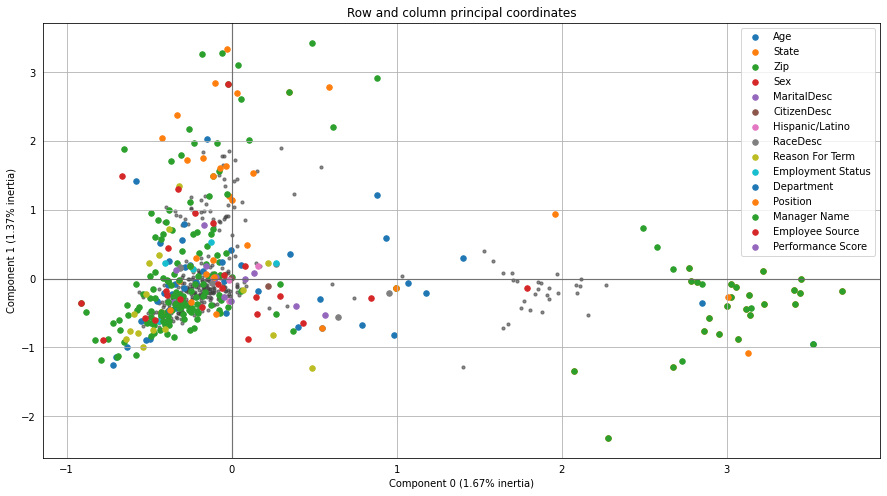

In [89]:
ax= mca.plot_coordinates(
    X=cat_cols,
    ax= None,
    figsize=(15, 8),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

### One hot encode the categorical features and note the change in dimensions in the data set.

In [90]:
# answer below:
# Get columns that we want to dummify
dum_cols=[]
for col in cat_cols:
    if hr[col].nunique() >= 2:
        dum_cols.append(col)

# Make dum_col columns object type for ease of dummifying
hr[dum_cols] = hr[dum_cols].astype('object')

# Dummify Columns
dums = pd.get_dummies(hr[dum_cols], drop_first=True)
dums.head()

,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_58,Age_59,Age_62,Age_63,Age_65,Age_66,Age_67,State_AZ,State_CA,...,Manager Name_Eric Dougall,Manager Name_Janet King,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [91]:
hr_feat = pd.concat([dums, hr.drop(dum_cols, axis=1)], axis=1)
hr_feat.head()

,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_58,Age_59,Age_62,Age_63,Age_65,Age_66,Age_67,State_AZ,State_CA,...,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP,Pay Rate,Days Employed
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,28.50,3317
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,23.00,1420
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.00,1154
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,21.50,58
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,16.56,940


In [92]:
hr_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Columns: 339 entries, Age_26 to Days Employed
dtypes: float64(1), int64(1), uint8(337)
memory usage: 109.3 KB


### Reduce the one hot encoded categorical features down to two dimensions using MCA.

In [0]:
model= prince.MCA()
mca= model.fit(dums)
coordinates= mca.transform(dums)

### Plot the coordinates of each resulting dimension.

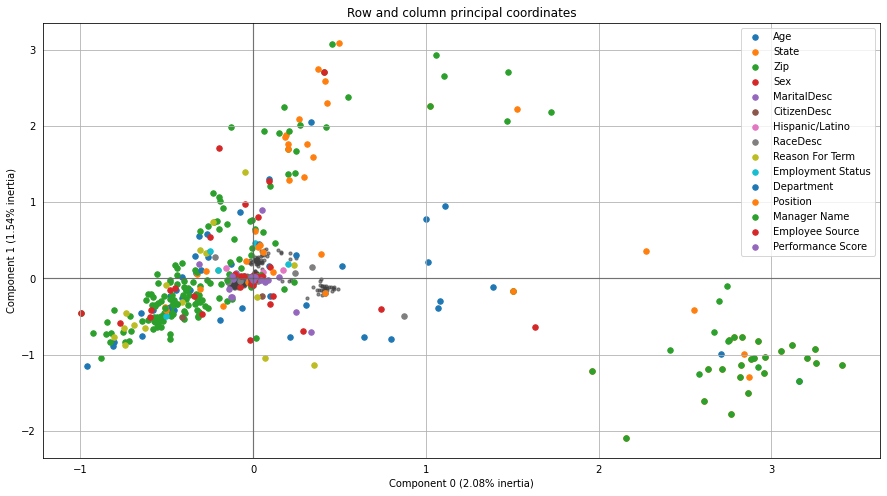

In [95]:
ax= mca.plot_coordinates(
    X=dums,
    ax= None,
    figsize=(15, 8),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [0]:
model= prince.FAMD()
famd= model.fit(hr)
coordinates= famd.transform(hr)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

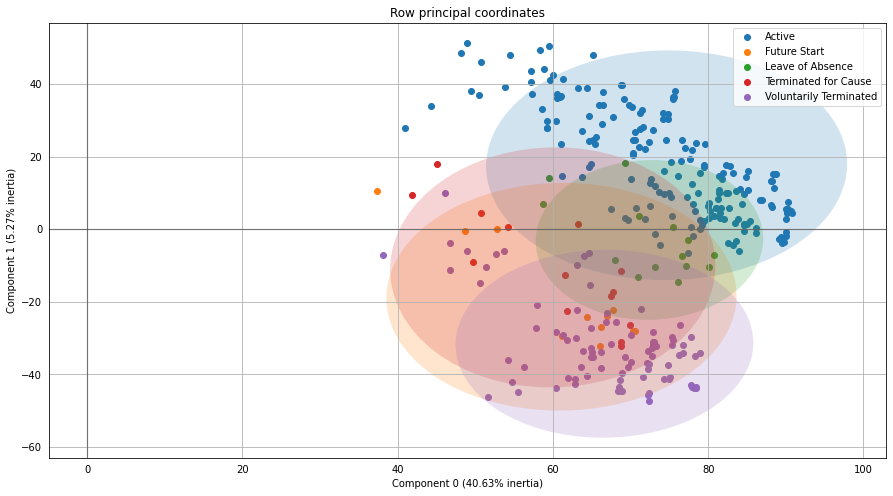

In [97]:
famd.plot_row_coordinates(
    X=hr,
    figsize=(15,8),
    color_labels=hr['Employment Status']
)